# Three-Dimensional Plotting in Matplotlib

In [2]:
# Using mplot3d to create 3d plots

from mpl_toolkits import mplot3d

Once this submodule is imported, a three dimensional  axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines:

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

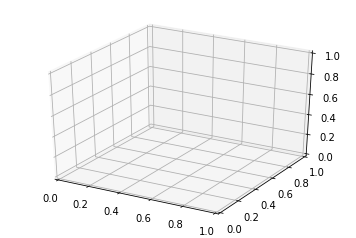

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this 3d axes enabled, we can now plot a variety of 3d plot types. 3d plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; 

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions. The call signature for these is nearly identical to that of their two-dimensional counterparts. 

Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

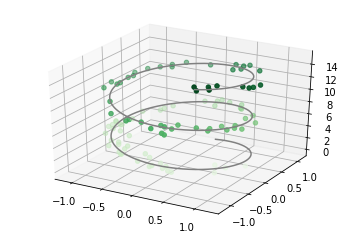

In [15]:
ax = plt.axes(projection='3d')

# Data for a 3d line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Three-dimensional Contour Plots

`mplot3d` contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional `ax.contour` plots, `ax.contour3D` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each ploint. Here we'll show a three-dimensional contour diagram of three-dimensional sinusoidal function:

In [16]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

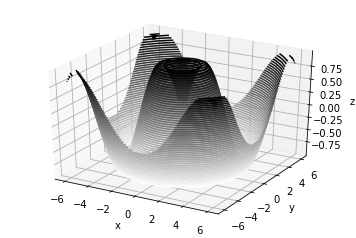

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

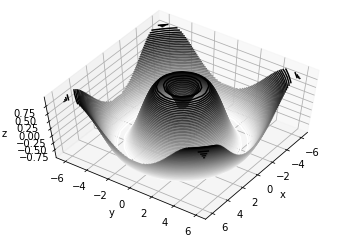

In [18]:
## set the elevation and azimuthal angles
ax.view_init(60, 35)
fig

## Wireframes and Surface Plots

Two other types of 3d plots that wok on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified 3d surface, and can make the resulting 3d forms quite easy to visualize.

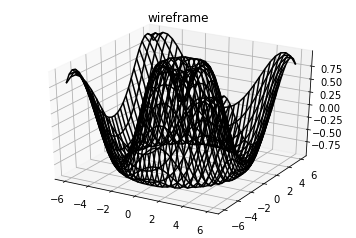

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

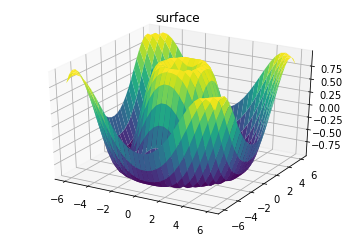

In [22]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
               cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear. 

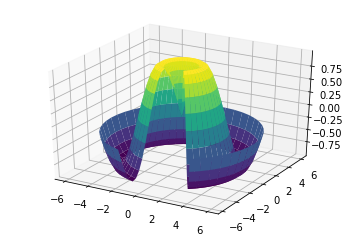

In [24]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations


In [25]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

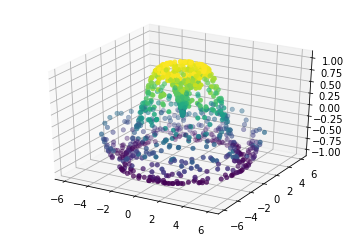

In [26]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

This leaves a lot to be desired. The function that will help us in this cas is `ax.plot_trisurf`, which creates a surface by first finding a set of traingles formed between adjacent points (remeber that x, y and z here are 1d arrays):

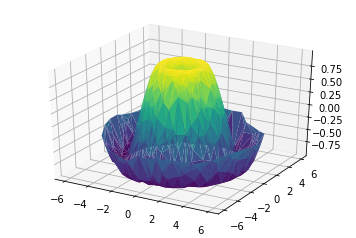

In [27]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
               cmap='viridis', edgecolor='none');

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a traingulation allows for some really interesting 3d plots.

### Example: Visualizing a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
Topologically, it's quite interesting because despite appearances it has only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [34]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the (x, y, z) positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [35]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [36]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation within the underlying parametrization, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip. This can be accomplished as follows:

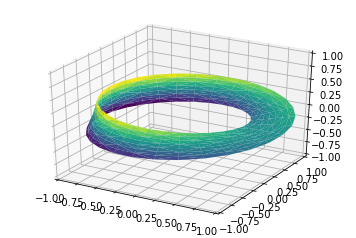

In [40]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);